In [65]:
import json
import sys
import music21
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from music21 import *

In [66]:
with open('./Data/data.json') as f:
    data = json.load(f)

df = pd.json_normalize(data)

## Nombre de morceaux par clé, par partie 

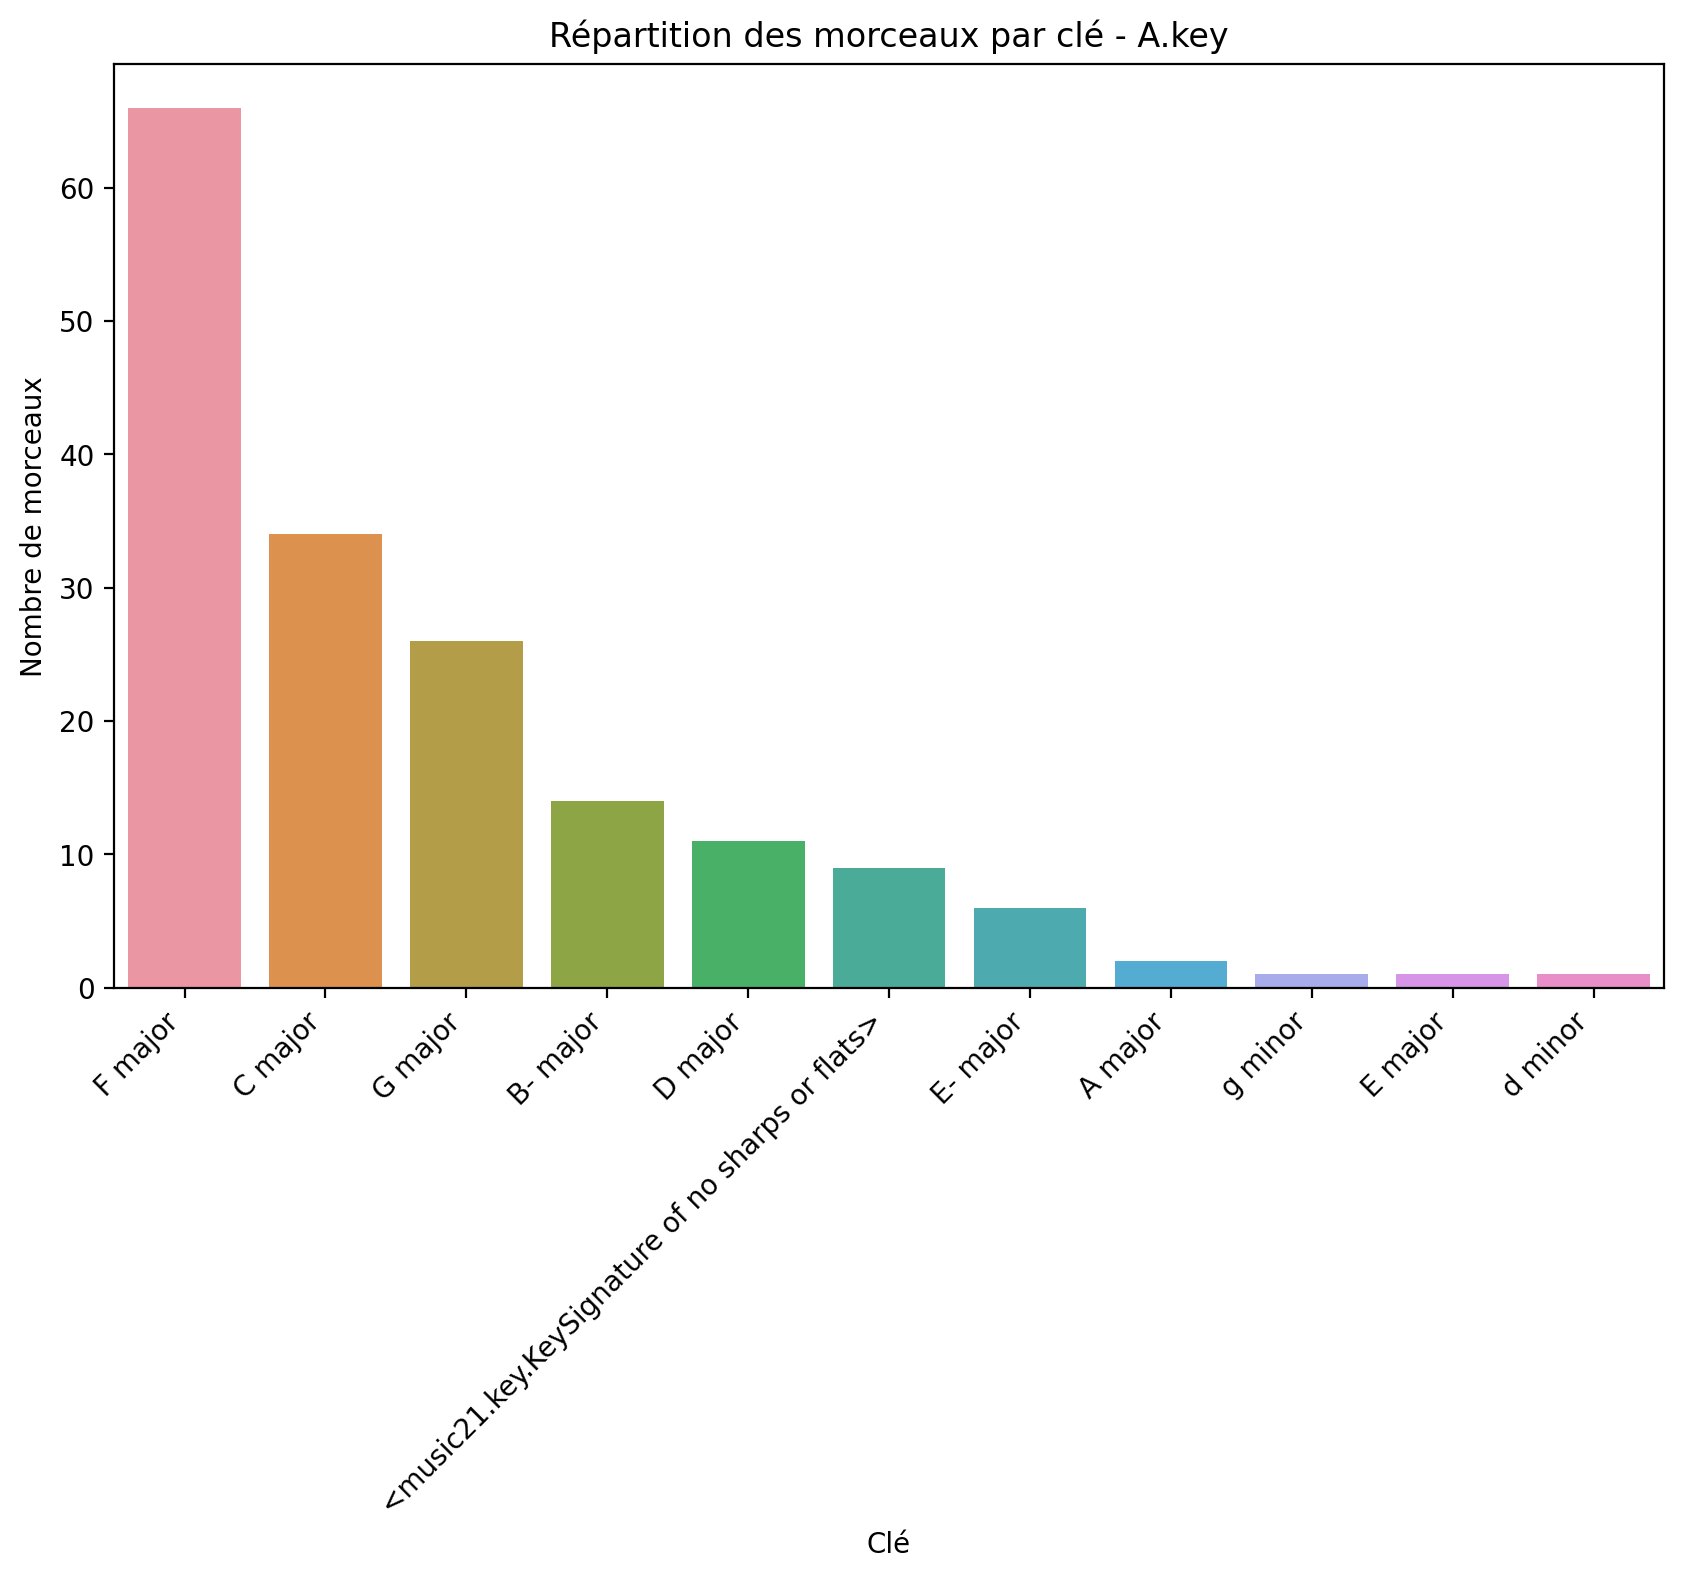

In [67]:
# Compter le nombre de morceaux par clé

count_by_key = df[df['A.key'].notnull()]['A.key'].value_counts()
sorted_keys = count_by_key.sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='A.key', data=df[df['A.key'].notnull()], order=sorted_keys)
plt.title('Répartition des morceaux par clé - A.key')
plt.xlabel('Clé')
plt.ylabel('Nombre de morceaux')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

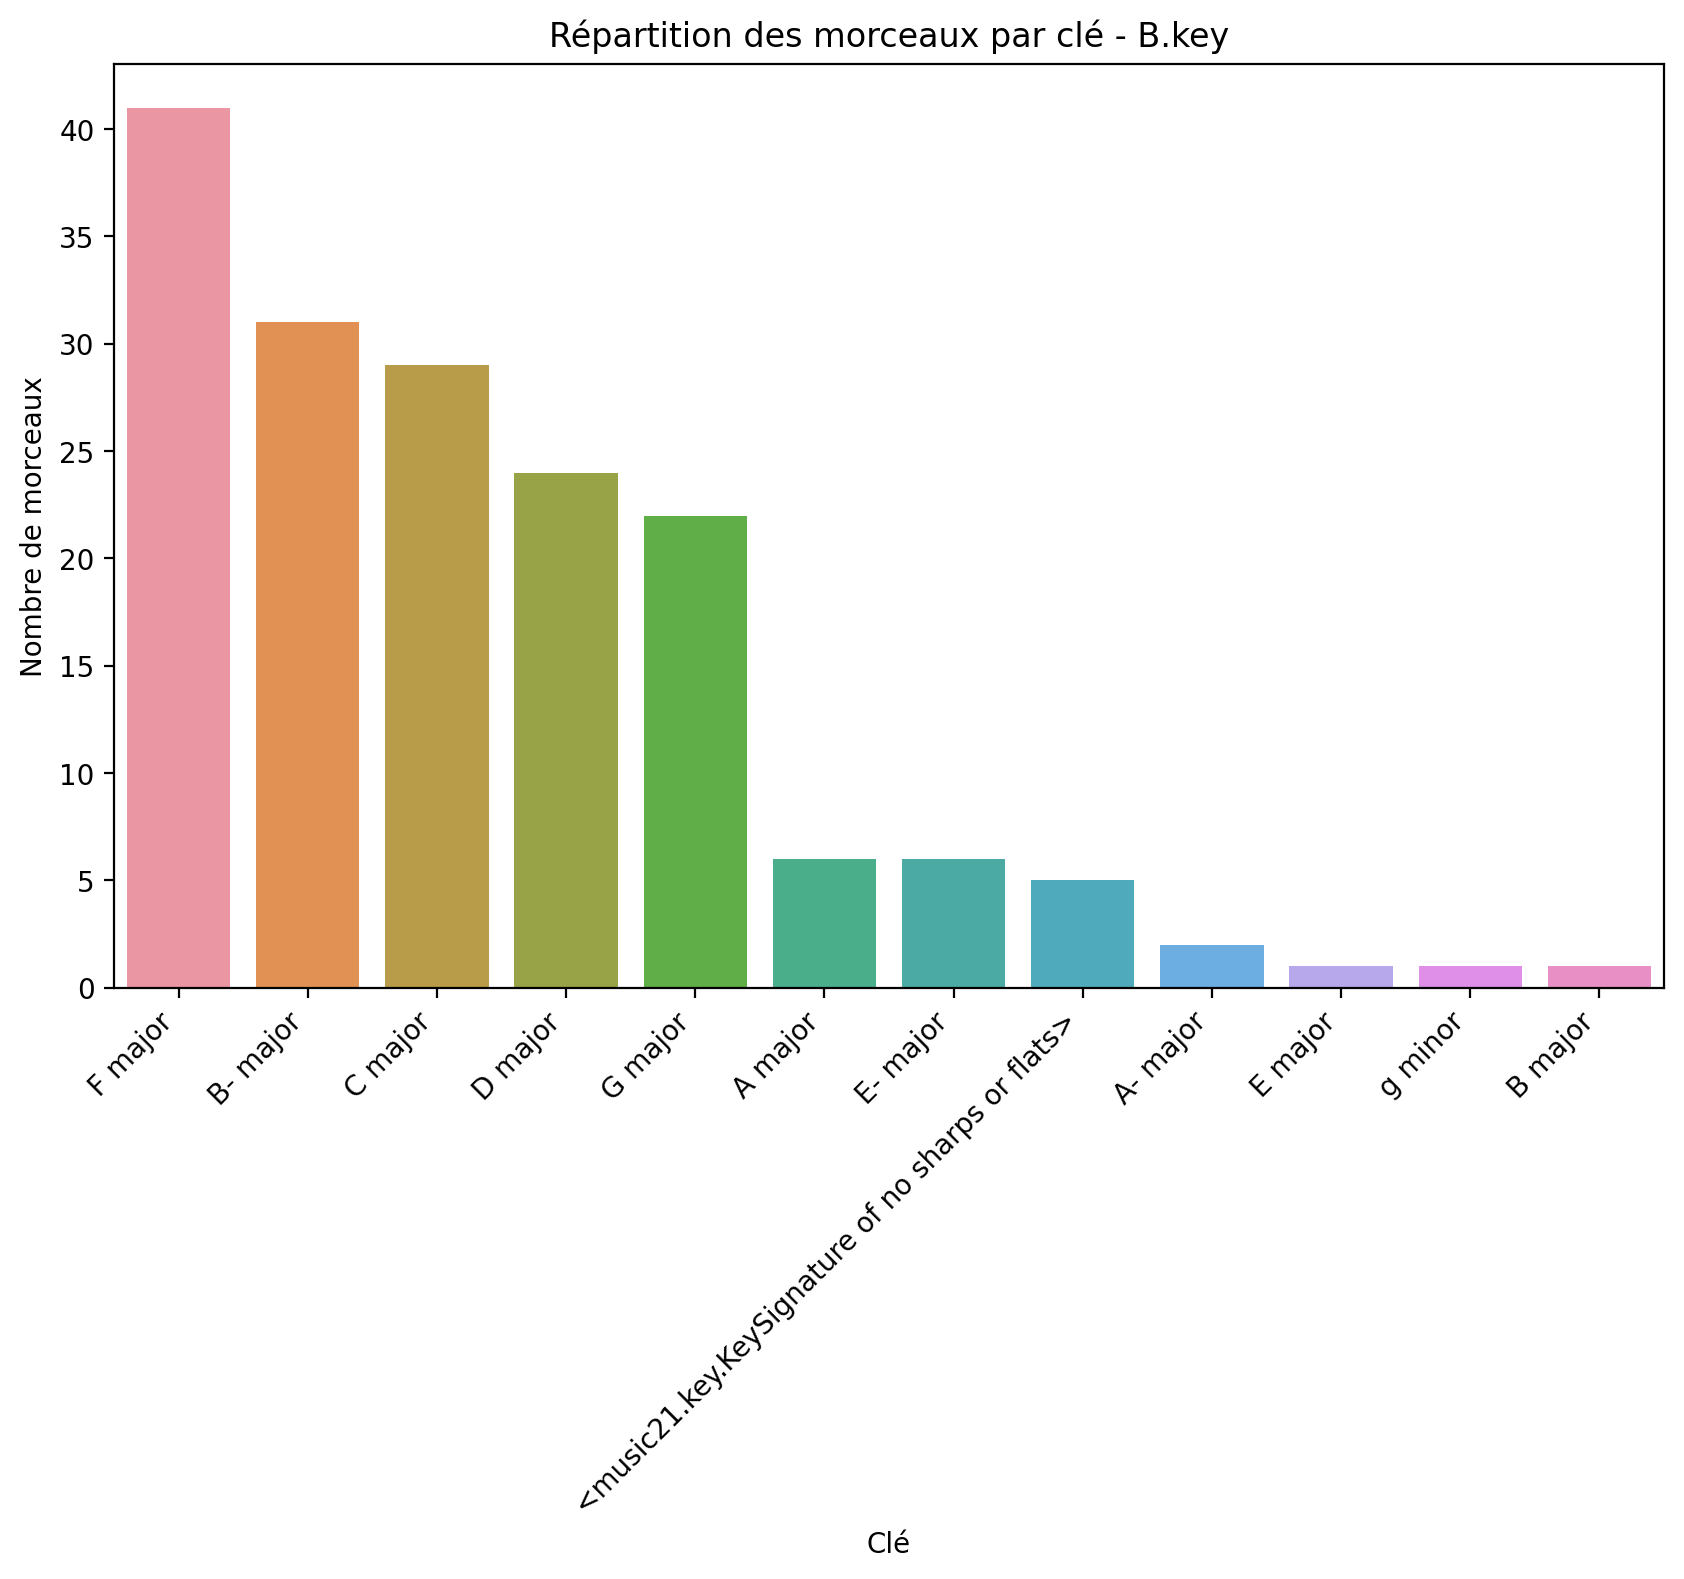

In [68]:
count_by_key = df[df['B.key'].notnull()]['B.key'].value_counts()
sorted_keys = count_by_key.sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='B.key', data=df[df['B.key'].notnull()], order=sorted_keys)
plt.title('Répartition des morceaux par clé - B.key')
plt.xlabel('Clé')
plt.ylabel('Nombre de morceaux')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

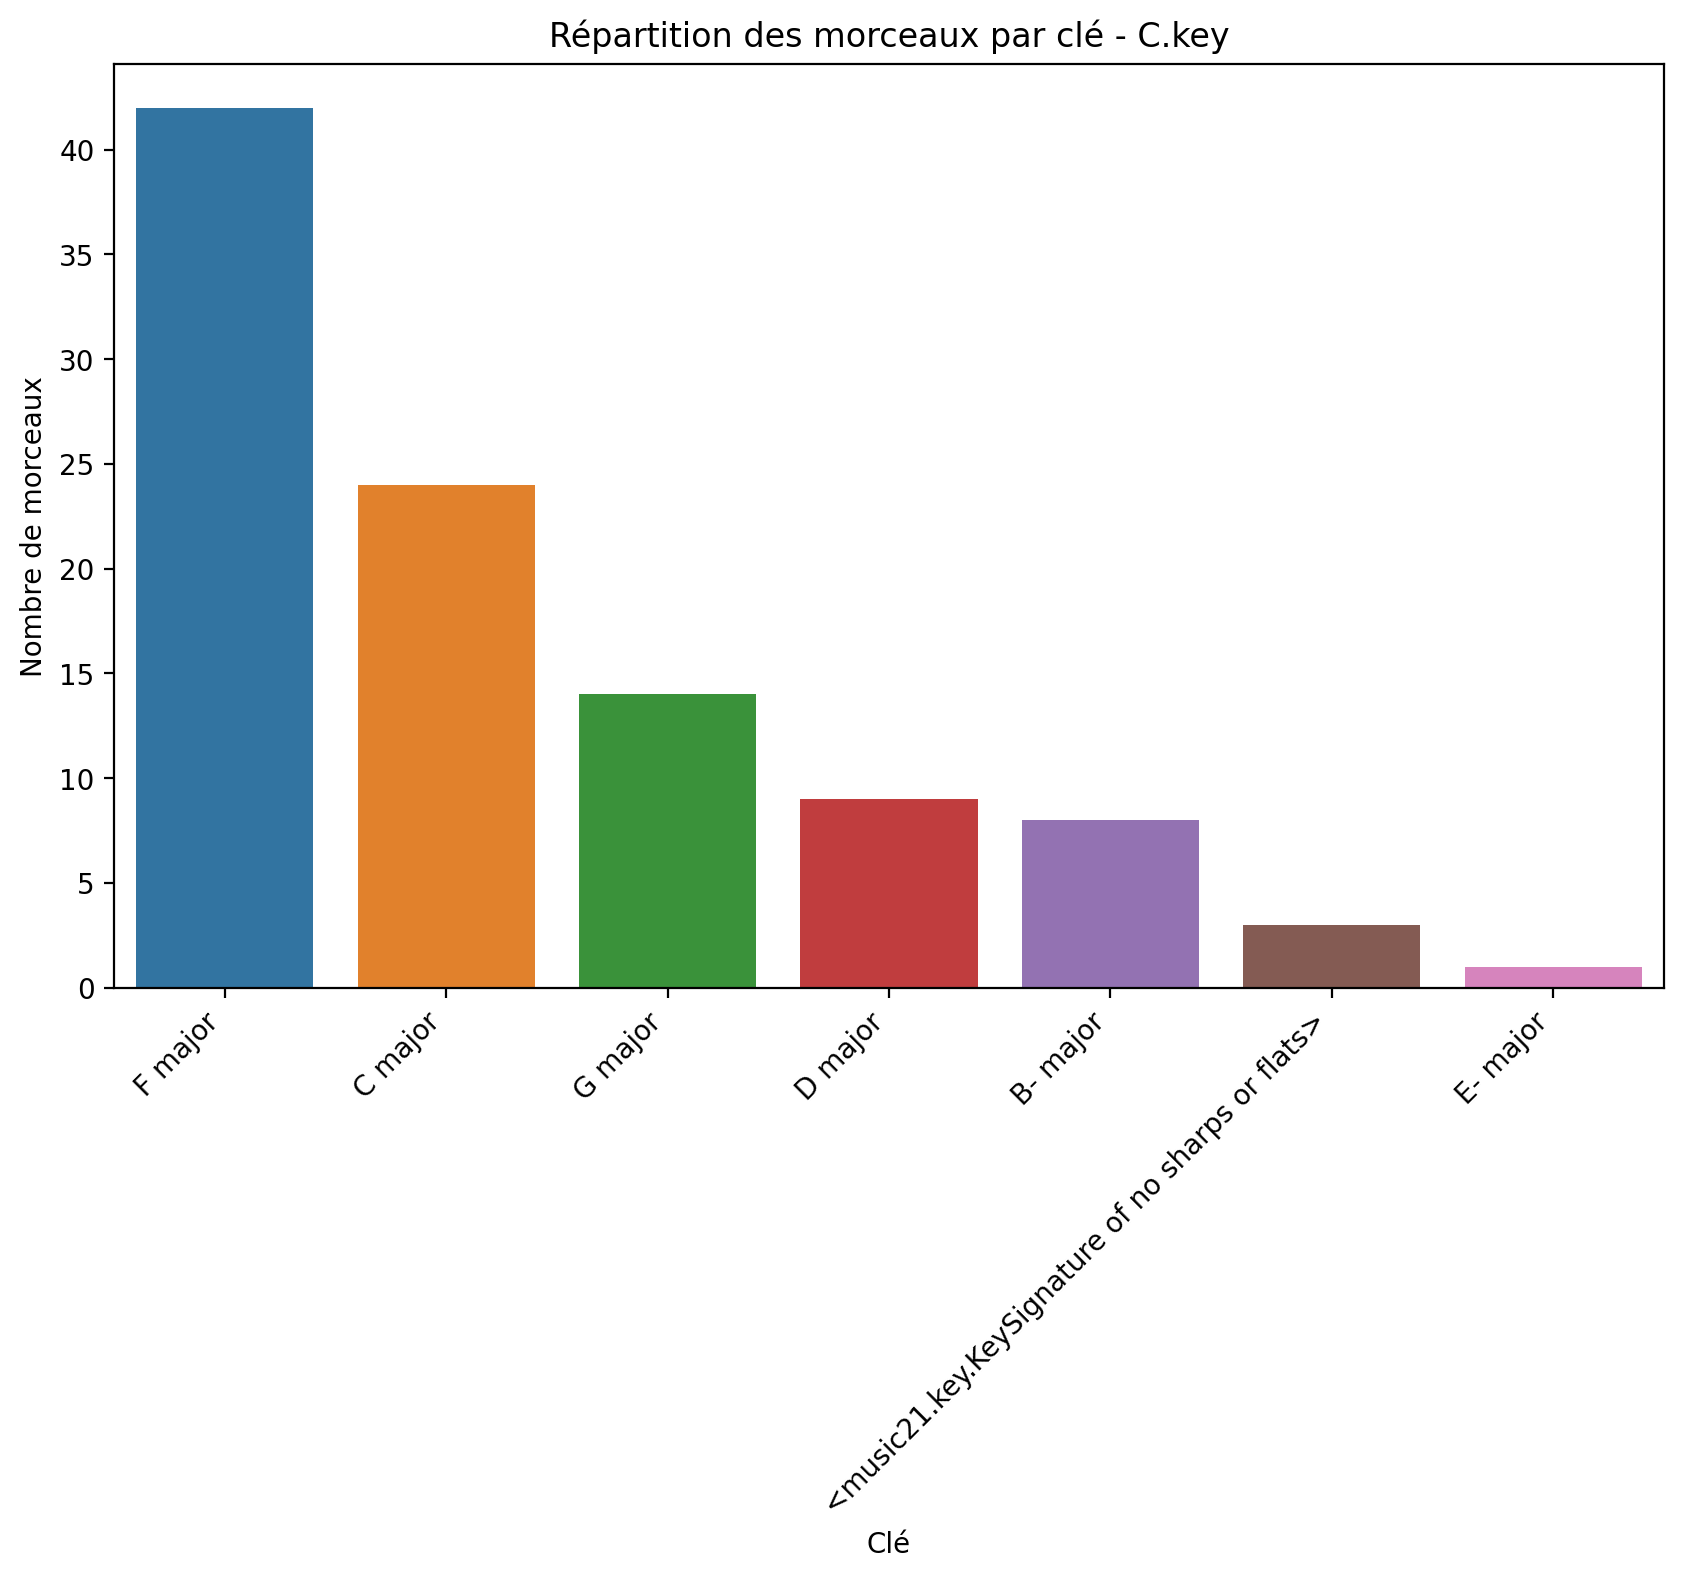

In [69]:
count_by_key = df[df['C.key'].notnull()]['C.key'].value_counts()
sorted_keys = count_by_key.sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='C.key', data=df[df['C.key'].notnull()], order=sorted_keys)
plt.title('Répartition des morceaux par clé - C.key')
plt.xlabel('Clé')
plt.ylabel('Nombre de morceaux')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

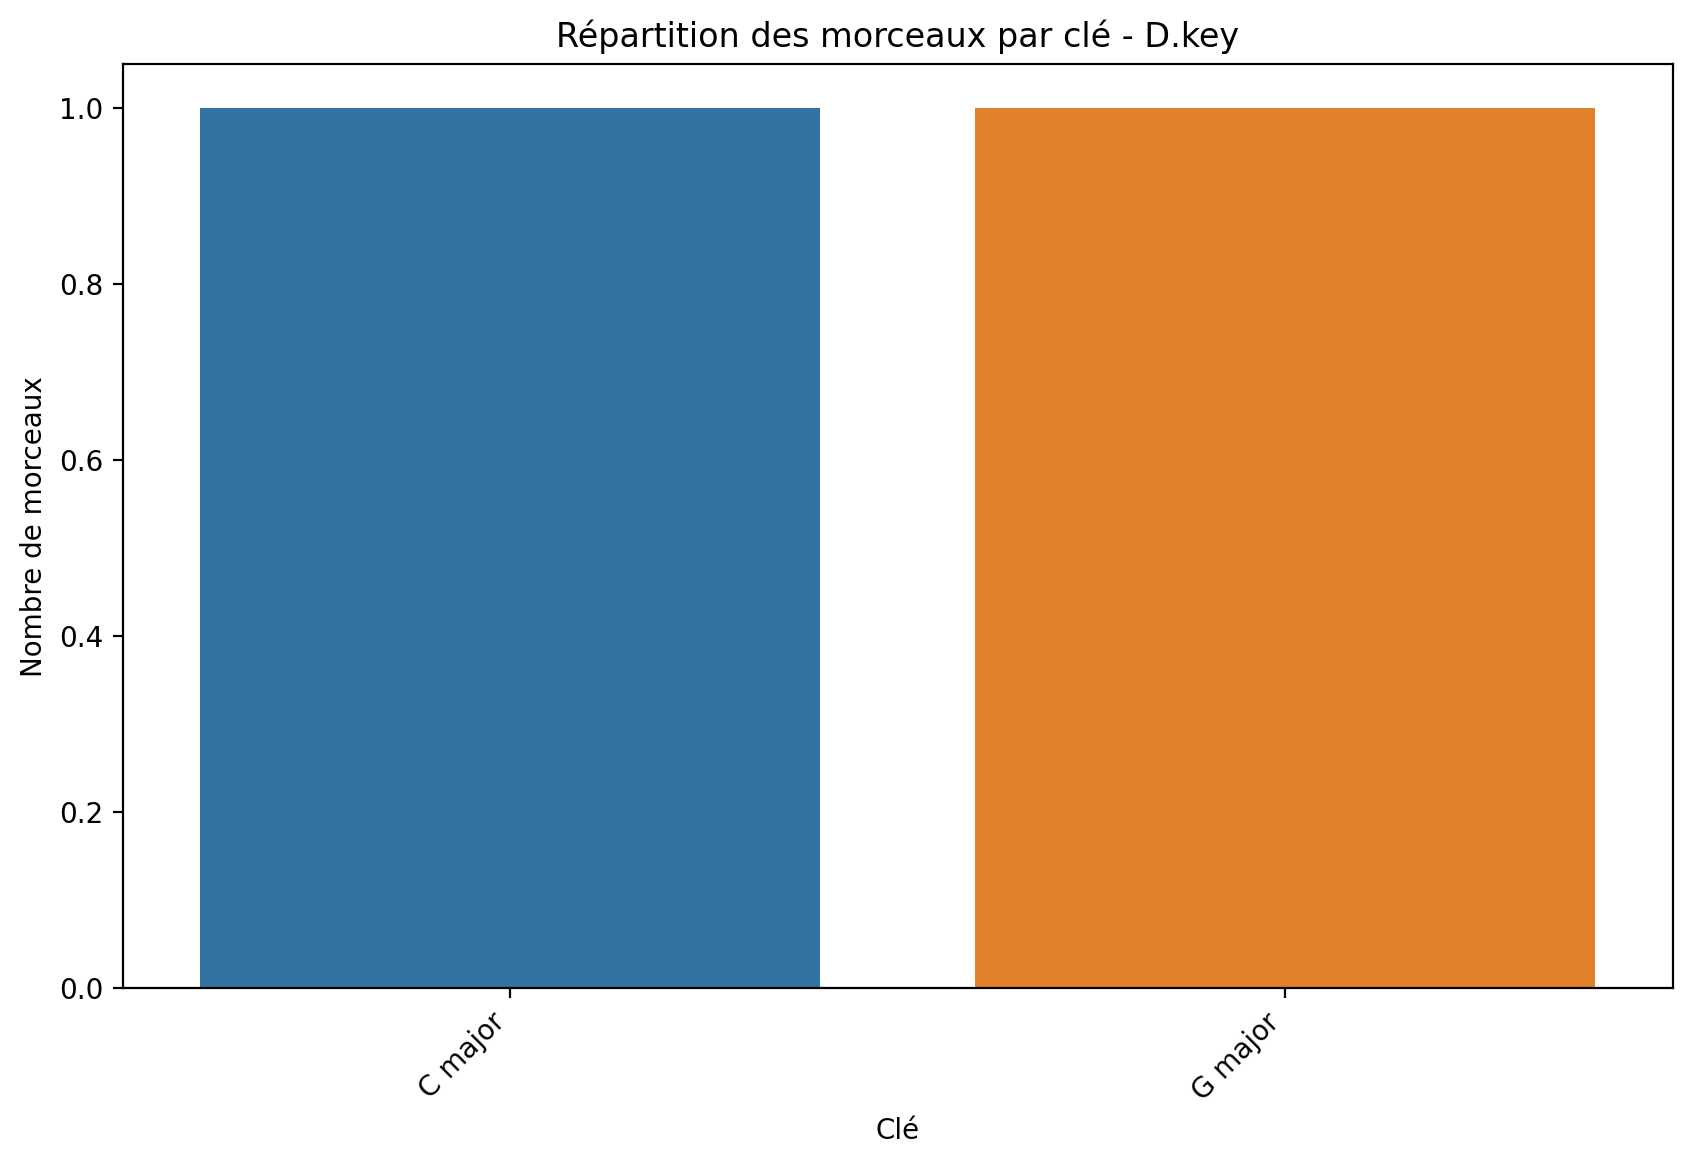

In [70]:
count_by_key = df[df['D.key'].notnull()]['D.key'].value_counts()
sorted_keys = count_by_key.sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='D.key', data=df[df['D.key'].notnull()], order=sorted_keys)
plt.title('Répartition des morceaux par clé - D.key')
plt.xlabel('Clé')
plt.ylabel('Nombre de morceaux')

# Incliner les étiquettes de l'axe des x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

## Vérification des longueurs des parties extraites

In [71]:
df

,title,time_signature,A.key,A.1.Notes,A.1.Expressions,A.1.Accords,A.2.Notes,A.2.Expressions,A.2.Accords,A.3.Notes,...,C.34.Accords,C.35.Notes,C.35.Expressions,C.35.Accords,C.36.Notes,C.36.Expressions,C.36.Accords,C.37.Notes,C.37.Expressions,C.37.Accords
0,A Ginga do Mané,2/4,F major,"[[E6, 16th], [G5, 16th], [G#5, 16th], [A5, 16t...","[[Gm6, 1.5]]",[],"[[E6, 16th], [G5, 16th], [G#5, 16th], [A5, 16t...","[[Gm6, 1.5]]",[],"[[E6, 16th], [G5, 16th], [G#5, 16th], [A5, 16t...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A Vida é um Buraco,2/4,C major,"[[E5, 16th], [D5, 16th], [C5, 16th], [B4, 16th]]",[],[],"[[E5, 16th], [D5, 16th], [C5, 16th], [B4, 16th]]",[],[],"[[E5, 16th], [D5, 16th], [C5, 16th], [B4, 16th]]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACARICIANDO,2/4,F major,"[[A4, 16th], [C5, eighth], [D5, 16th], [D5, 16...","[[F6, 1.75]]",[],"[[A4, 16th], [C5, eighth], [D5, 16th], [D5, 16...","[[F6, 1.75]]",[],"[[A4, 16th], [C5, eighth], [D5, 16th], [D5, 16...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACERTA O PASSO,4/4,C major,"[[E4, 16th], [G4, 16th], [C5, 16th], [F#4, 16t...","[[Choro AA BB A CC A, 1.5]]","[[C, 1.0], [E-dim, 0.5]]","[[E4, 16th], [G4, 16th], [C5, 16th], [F#4, 16t...","[[Choro AA BB A CC A, 1.5]]","[[C, 1.0], [E-dim, 0.5]]","[[E4, 16th], [G4, 16th], [C5, 16th], [F#4, 16t...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aeroporto do Galeao,2/4,F major,"[[G4, eighth], [A4, 16th], [C5, 16th], [F4, 16...",[],"[[F6 add 9, 2.0]]","[[G4, eighth], [A4, 16th], [C5, 16th], [F4, 16...",[],"[[F6 add 9, 2.0]]","[[G4, eighth], [A4, 16th], [C5, 16th], [F4, 16...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Viva João da Baiana,2/4,B- major,"[[D5, 16th], [B-4, 16th], [G4, 16th], [D5, 16t...",[],"[[Gm, 1.5]]","[[D5, 16th], [B-4, 16th], [G4, 16th], [D5, 16t...",[],"[[Gm, 1.5]]","[[D5, 16th], [B-4, 16th], [G4, 16th], [D5, 16t...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,Vou Vivendo,2/4,F major,[],"[[F, 3.0]]","[[F#dim, 2.25]]",[],"[[F, 3.0]]","[[F#dim, 2.25]]",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,VÊ SE GOSTAS,2/4,G major,"[[E4, half]]",[],"[[G6, 2.0]]","[[E4, half]]",[],"[[G6, 2.0]]","[[E4, half]]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,É DO PANGARÉ,2/4,F major,"[[D4, 16th], [E4, 16th], [F4, 16th], [G4, 16th...",[],"[[Dm, 0.5]]","[[D4, 16th], [E4, 16th], [F4, 16th], [G4, 16th...",[],"[[Dm, 0.5]]","[[D4, 16th], [E4, 16th], [F4, 16th], [G4, 16th...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# df['Total_Notes_A'] = df['A.1.Notes'].apply(lambda x: sum(len(section) for section in x) if isinstance(x, list) else 0)
# df['Total_Notes_B'] = df['B.1.Notes'].apply(lambda x: sum(len(section) for section in x) if isinstance(x, list) else 0)

# print(df[['Total_Notes_A', 'Total_Notes_B']])

# mean_notes_A = df['Total_Notes_A'].mean()
# median_notes_B = df['Total_Notes_B'].median()

# print(f"Moyenne des notes dans la partie A : {mean_notes_A}")
# print(f"Médiane des notes dans la partie B : {median_notes_B}")

In [73]:
def count_subparts(song, part):
    subparts = [subpart for subpart in song[part].keys() if subpart != 'key']
    return len(subparts)


counts_dict = {'titre': [song['title'] for song in data]}
for part in ['A', 'B', 'C', 'D']:  # Ajouter d'autres parties si besoin
    counts_dict[f'cpt_part_{part}'] = [count_subparts(song, part) if part in song else 0 for song in data]


df_counts = pd.DataFrame(counts_dict)

print(df_counts)


                   titre  cpt_part_A  cpt_part_B  cpt_part_C  cpt_part_D
0        A Ginga do Mané          16          16          16           0
1     A Vida é um Buraco          16          16          16           0
2            ACARICIANDO          24          16           0           0
3         ACERTA O PASSO          16          16          16           0
4    Aeroporto do Galeao          16          16           0           0
..                   ...         ...         ...         ...         ...
166  Viva João da Baiana          16          16           8           0
167          Vou Vivendo          16          16          16           0
168         VÊ SE GOSTAS          32          16           0           0
169         É DO PANGARÉ          16          17          16           0
170          É DO QUE HÁ          32          18          16           0

[171 rows x 5 columns]


## Notes

In [74]:
from collections import Counter

def count_notes(note_list):
    return dict(Counter(note[0] for note in note_list))

df['Note_Count_A'] = df['A.1.Notes'].apply(lambda x: count_notes(x) if isinstance(x, list) else {})
df['Note_Count_B'] = df['B.1.Notes'].apply(lambda x: count_notes(x) if isinstance(x, list) else {})

note_counts_A = pd.DataFrame(df['Note_Count_A'].tolist()).fillna(0)
note_counts_B = pd.DataFrame(df['Note_Count_B'].tolist()).fillna(0)

note_counts_A_sum = note_counts_A.sum()
note_counts_B_sum = note_counts_B.sum()


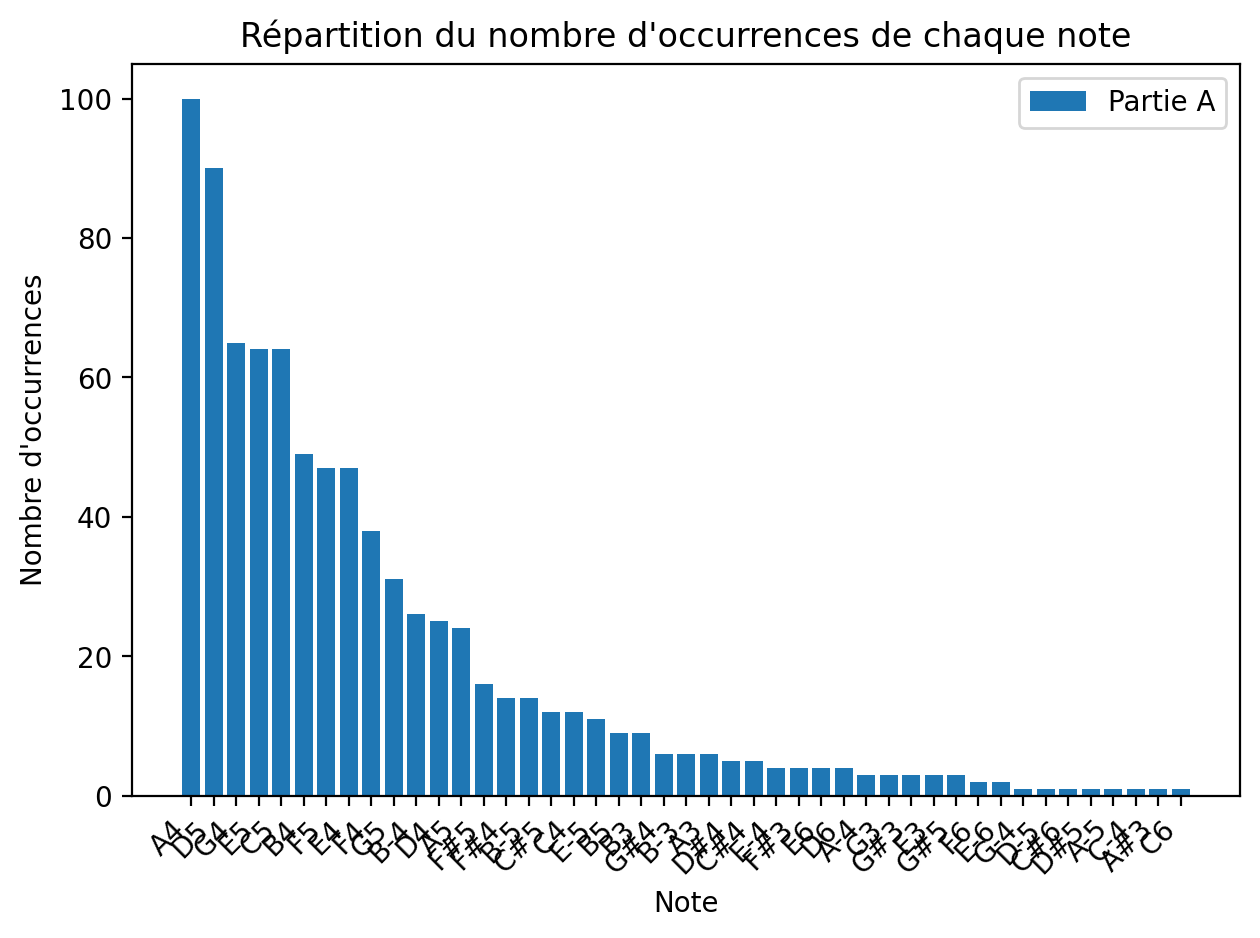

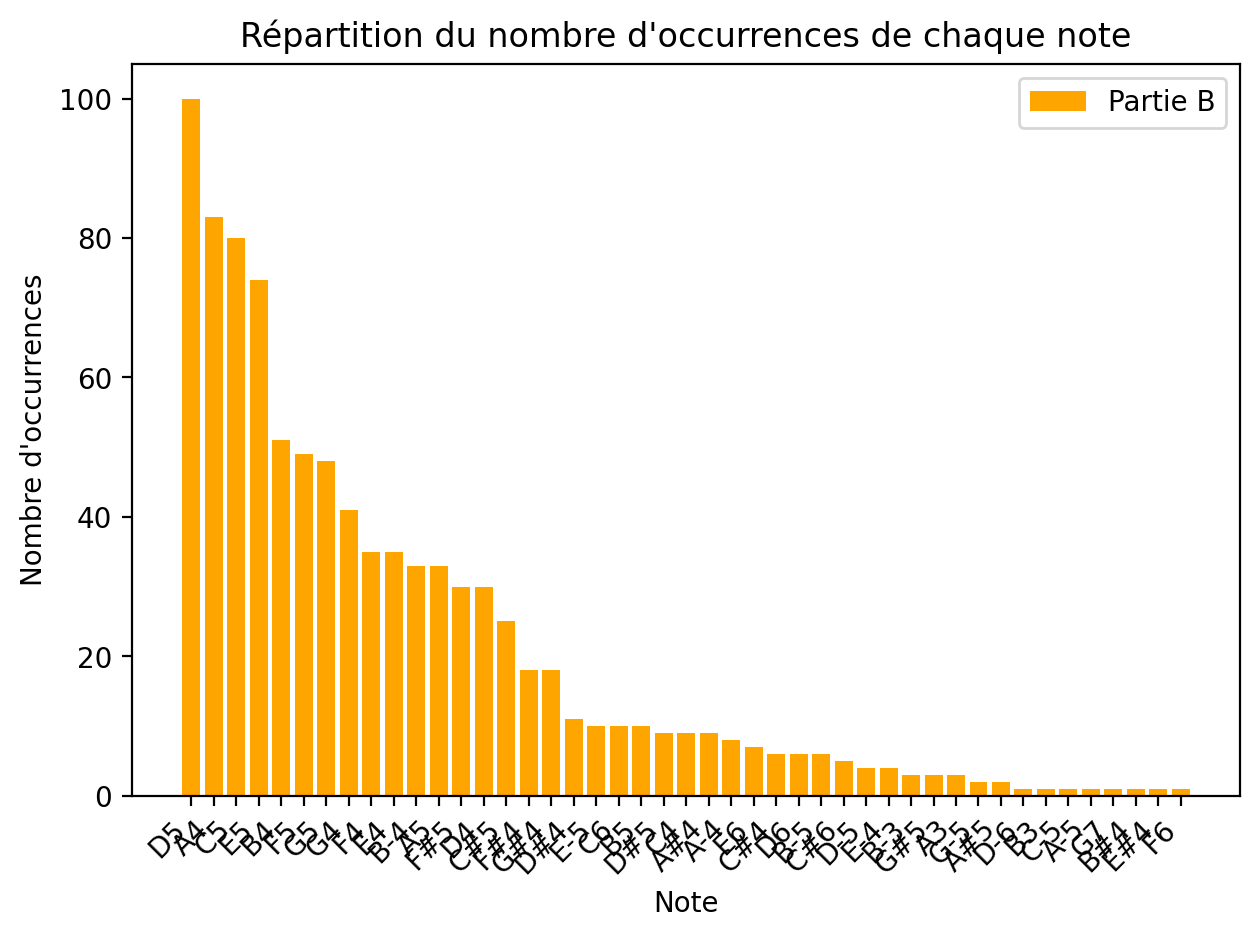

In [75]:
note_counts_A_sum_sorted = note_counts_A_sum.sort_values(ascending=False)

plt.bar(note_counts_A_sum_sorted.index, note_counts_A_sum_sorted.values, label='Partie A')
plt.xlabel('Note')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition du nombre d\'occurrences de chaque note')
plt.xticks(rotation=45, ha='right')  
plt.legend()
plt.tight_layout()
plt.show()

note_counts_B_sum_sorted = note_counts_B_sum.sort_values(ascending=False)

plt.bar(note_counts_B_sum_sorted.index, note_counts_B_sum_sorted.values, label='Partie B', color='orange')
plt.xlabel('Note')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition du nombre d\'occurrences de chaque note')
plt.xticks(rotation=45, ha='right') 
plt.legend()
plt.tight_layout()
plt.show()


In [76]:
df_A_sorted = pd.DataFrame({'Note': note_counts_A_sum_sorted.index, 'Occurrences': note_counts_A_sum_sorted.values})

print("Partie A - Répartition du nombre d'occurrences de chaque note")
print(df_A_sorted)


Partie A - Répartition du nombre d'occurrences de chaque note
   Note  Occurrences
0    A4        100.0
1    D5         90.0
2    G4         65.0
3    E5         64.0
4    C5         64.0
5    B4         49.0
6    F5         47.0
7    E4         47.0
8    F4         38.0
9    G5         31.0
10  B-4         26.0
11   D4         25.0
12   A5         24.0
13  F#5         16.0
14  F#4         14.0
15  B-5         14.0
16  C#5         12.0
17   C4         12.0
18  E-5         11.0
19   B5          9.0
20   B3          9.0
21  G#4          6.0
22  B-3          6.0
23   A3          6.0
24  D#4          5.0
25  C#4          5.0
26  E-4          4.0
27  F#3          4.0
28   E6          4.0
29   D6          4.0
30  A-4          3.0
31   G3          3.0
32  G#3          3.0
33   E3          3.0
34  G#5          3.0
35   F6          2.0
36  E-6          2.0
37  G-4          1.0
38  D-5          1.0
39  C#6          1.0
40  D#5          1.0
41  A-5          1.0
42  C-4          1.0
43  A#3       

In [77]:
df_B_sorted = pd.DataFrame({'Note': note_counts_B_sum_sorted.index, 'Occurrences': note_counts_B_sum_sorted.values})

print("\nPartie B - Répartition du nombre d'occurrences de chaque note")
print(df_B_sorted)


Partie B - Répartition du nombre d'occurrences de chaque note
   Note  Occurrences
0    D5        100.0
1    A4         83.0
2    C5         80.0
3    E5         74.0
4    B4         51.0
5    F5         49.0
6    G5         48.0
7    G4         41.0
8    F4         35.0
9    E4         35.0
10  B-4         33.0
11   A5         33.0
12  F#5         30.0
13   D4         30.0
14  C#5         25.0
15  F#4         18.0
16  G#4         18.0
17  D#4         11.0
18  E-5         10.0
19   C6         10.0
20   B5         10.0
21  D#5          9.0
22   C4          9.0
23  A#4          9.0
24  A-4          8.0
25   E6          7.0
26  C#4          6.0
27   D6          6.0
28  B-5          6.0
29  C#6          5.0
30  D-5          4.0
31  E-4          4.0
32  B-3          3.0
33  G#5          3.0
34   A3          3.0
35  G-5          2.0
36  A#5          2.0
37  D-6          1.0
38   B3          1.0
39  C-5          1.0
40  A-5          1.0
41   G7          1.0
42  B#4          1.0
43  E#4      

In [78]:
from collections import Counter

def count_notes(note_list):
    return dict(Counter(note[0] for note in note_list))

df['Note_Count_A'] = df['A.1.Notes'].apply(lambda x: count_notes(x) if isinstance(x, list) else {})
df['Note_Count_B'] = df['B.1.Notes'].apply(lambda x: count_notes(x) if isinstance(x, list) else {})

note_counts_A = pd.DataFrame(df['Note_Count_A'].tolist()).fillna(0)
note_counts_B = pd.DataFrame(df['Note_Count_B'].tolist()).fillna(0)

note_counts_A_sum = note_counts_A.sum()
note_counts_B_sum = note_counts_B.sum()

note_percentages_A = (note_counts_A_sum / note_counts_A_sum.sum()) * 100
note_percentages_B = (note_counts_B_sum / note_counts_B_sum.sum()) * 100



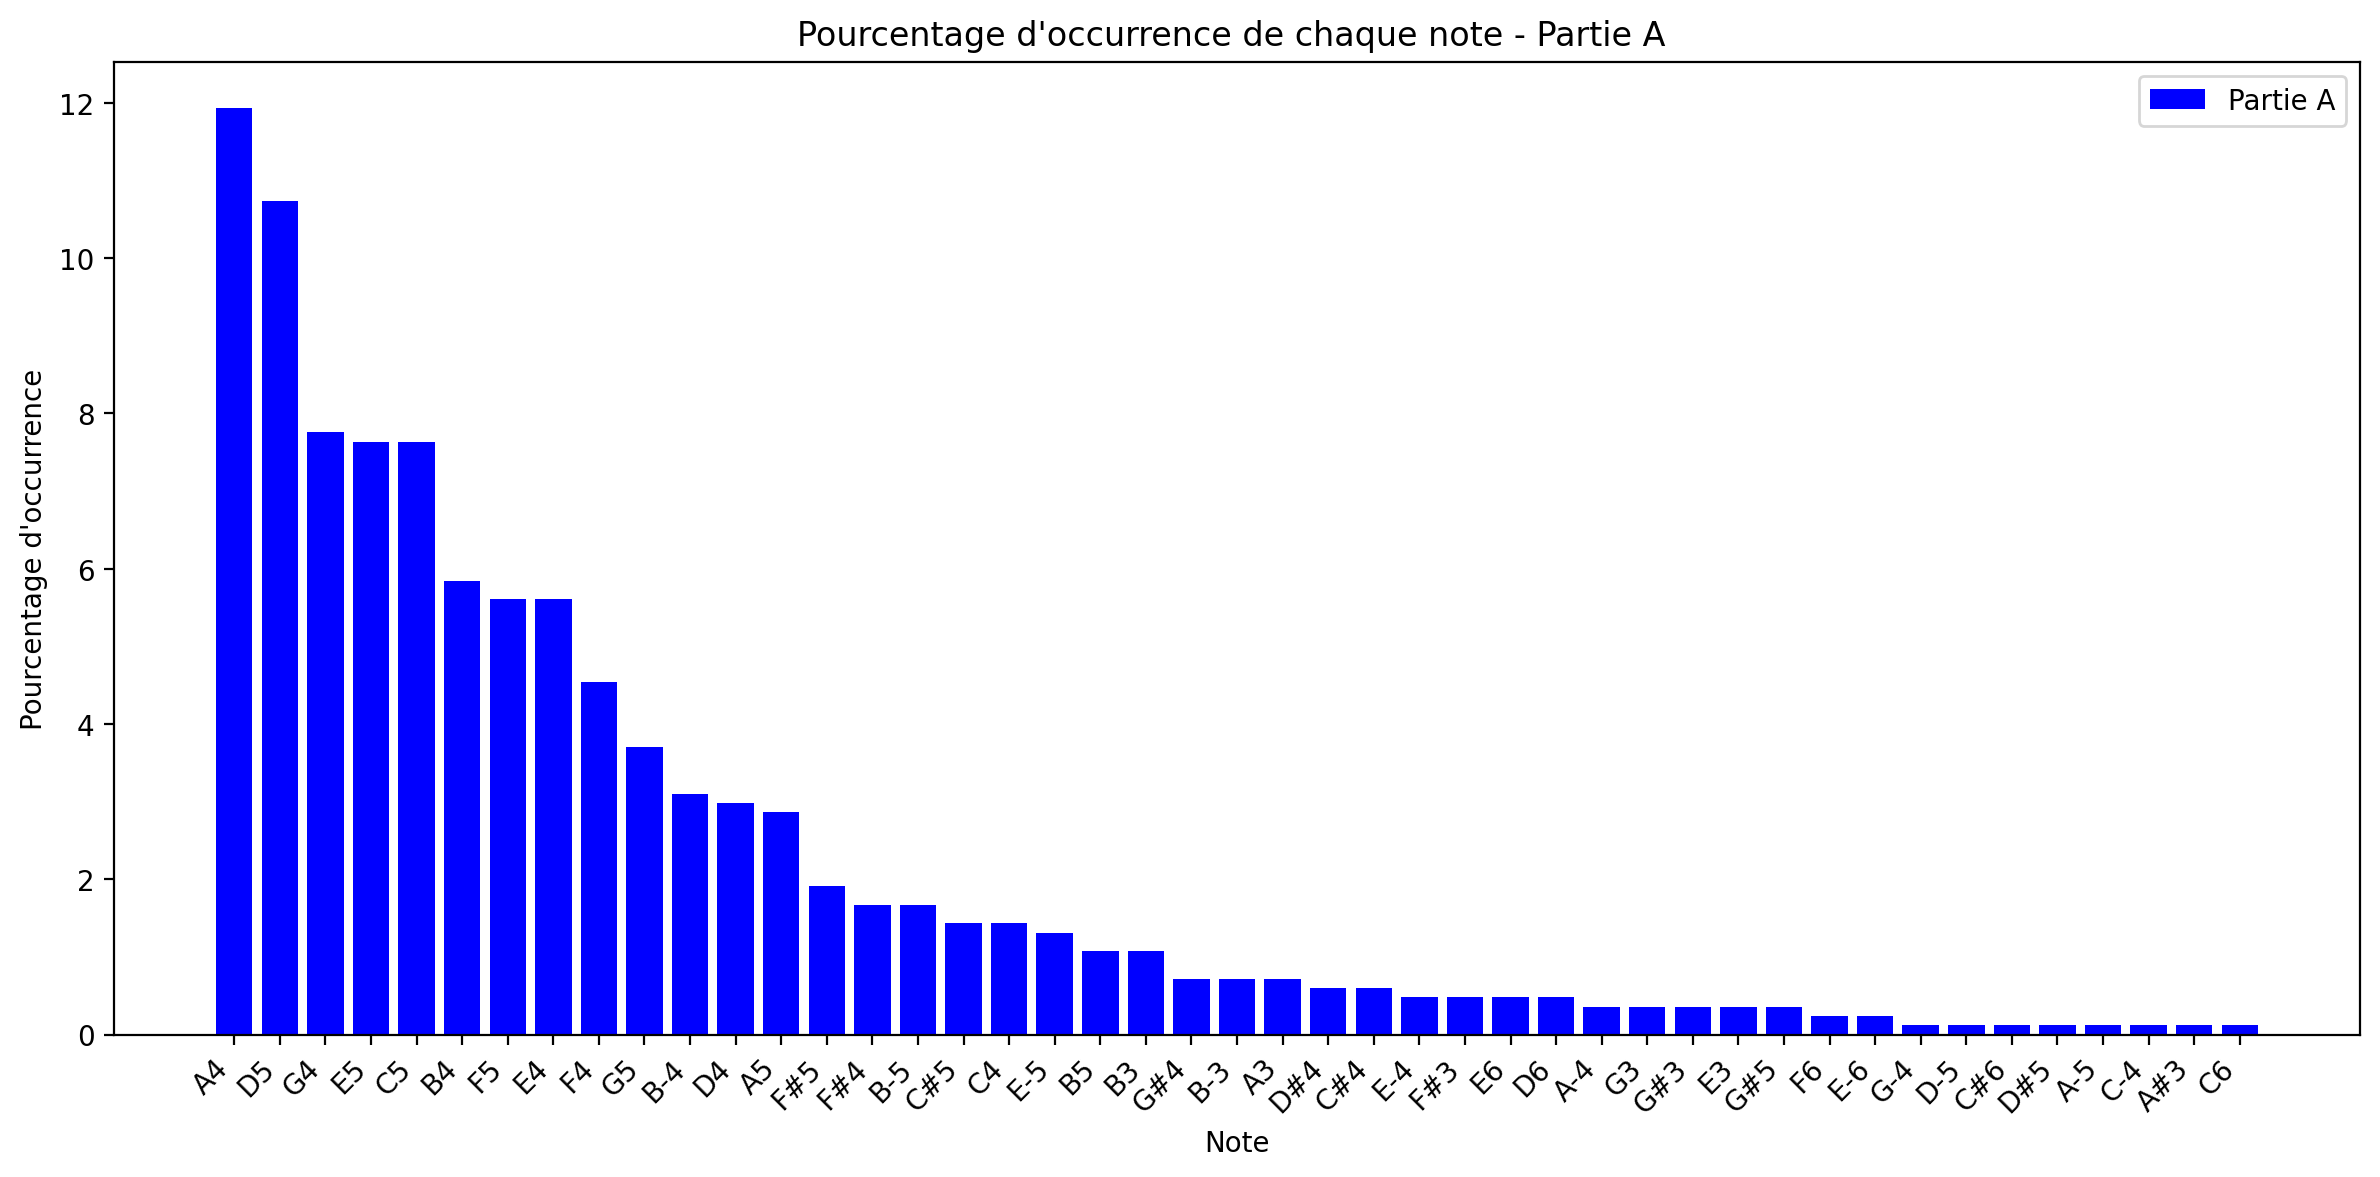

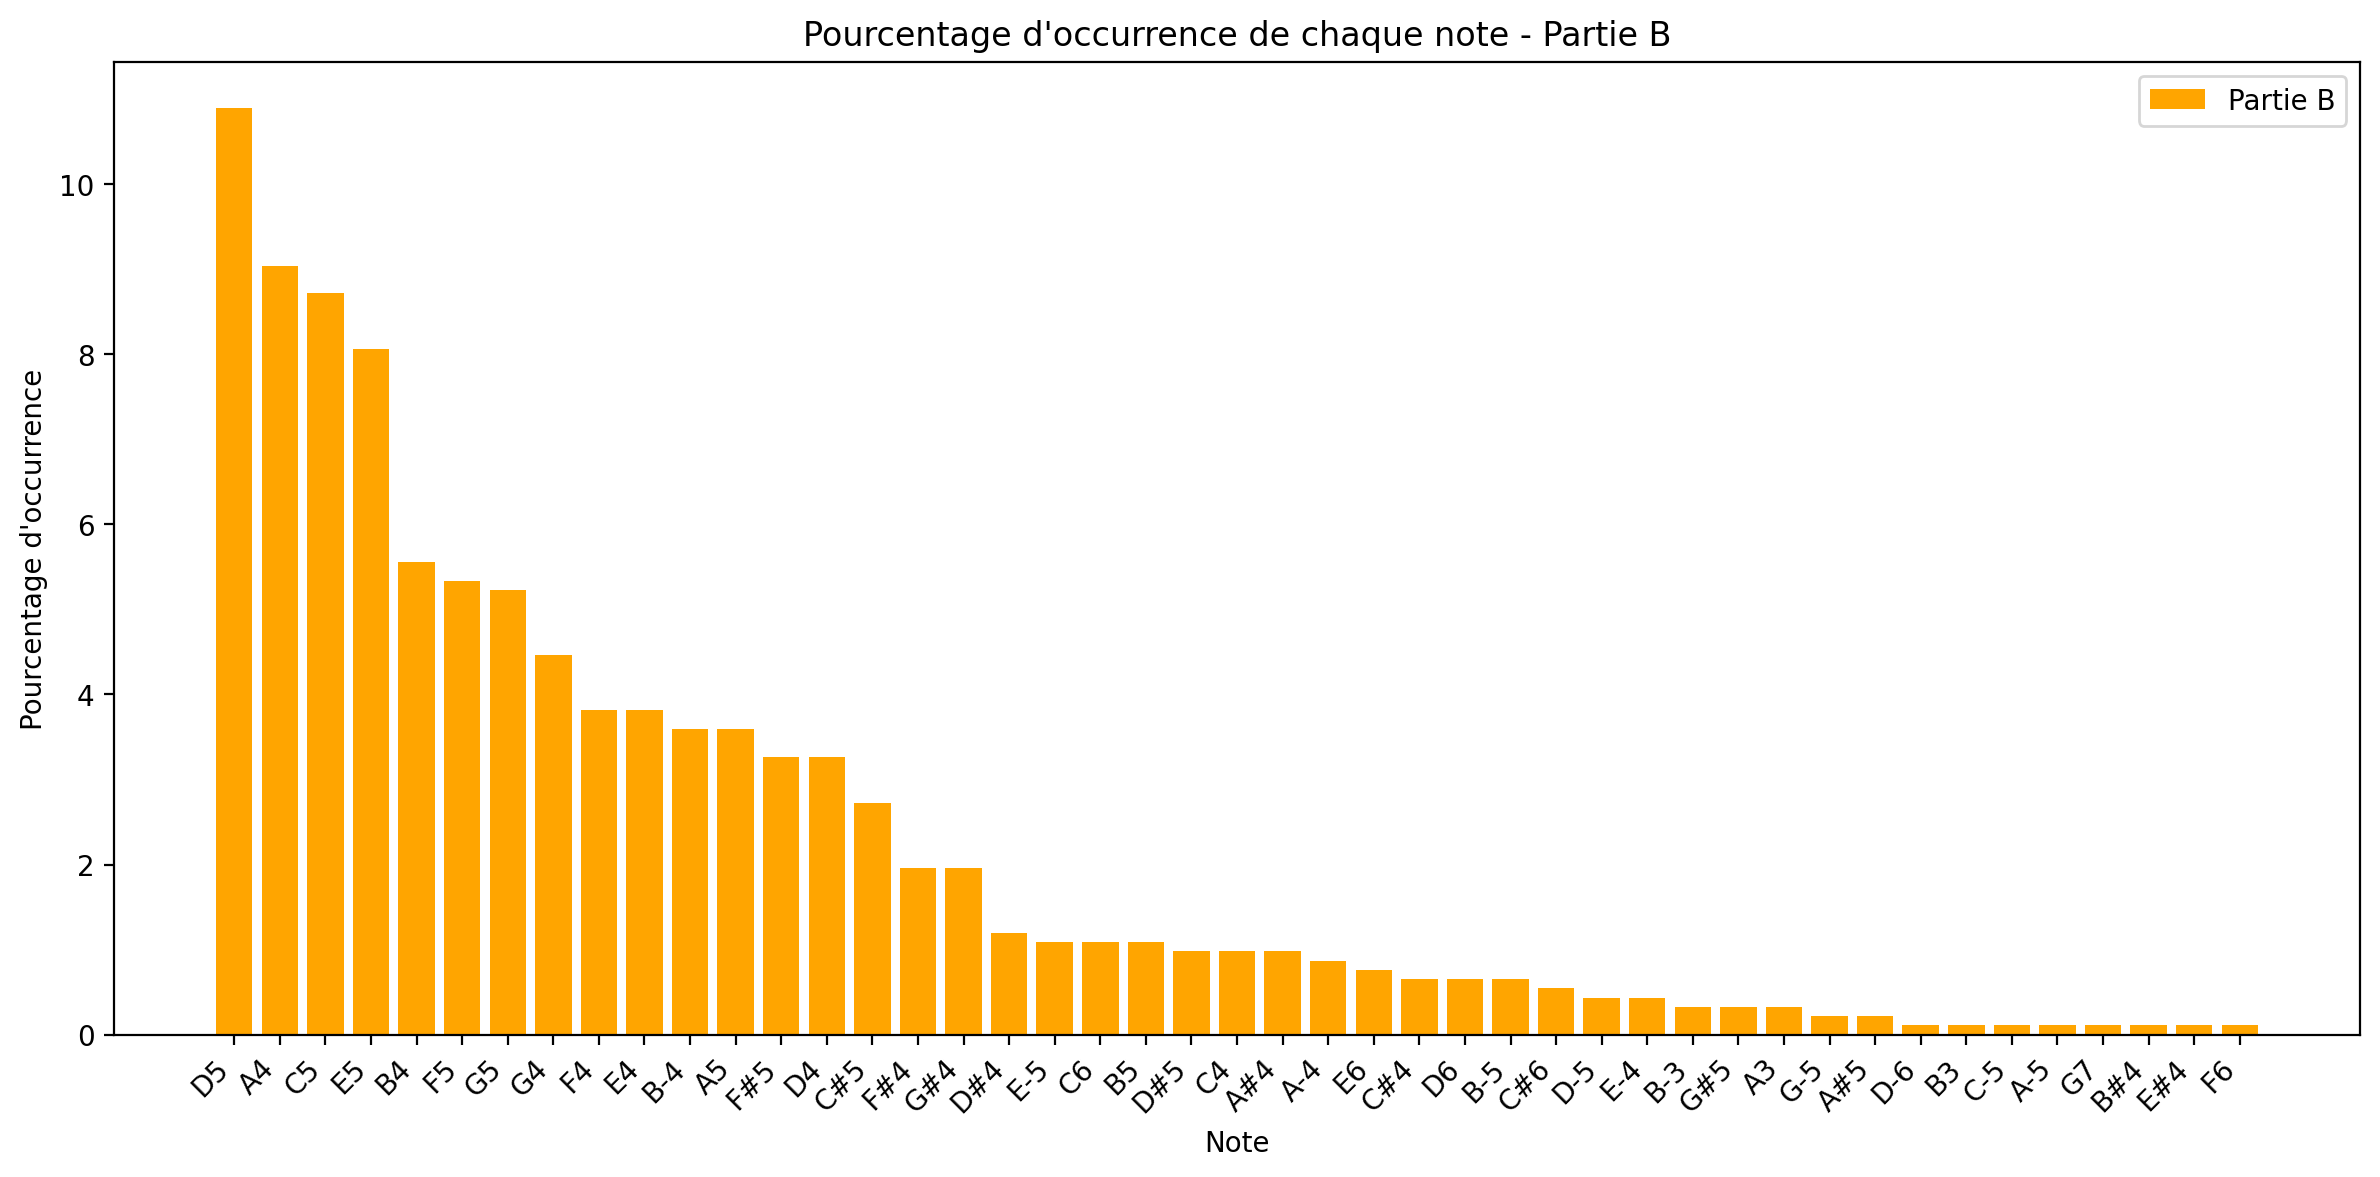

In [79]:
note_percentages_A = note_percentages_A.sort_values(ascending=False)
note_percentages_B = note_percentages_B.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(note_percentages_A.index, note_percentages_A.values, label='Partie A', color='blue')


plt.xlabel('Note')
plt.ylabel('Pourcentage d\'occurrence')
plt.title('Pourcentage d\'occurrence de chaque note - Partie A ')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(note_percentages_B.index, note_percentages_B.values, label='Partie B', color='orange')

plt.xlabel('Note')
plt.ylabel('Pourcentage d\'occurrence')
plt.title('Pourcentage d\'occurrence de chaque note - Partie B')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [80]:
import pandas as pd

df_A_pn = pd.DataFrame({'Note': note_percentages_A.index, 'Pourcentage d\'occurrence (Partie A)': note_percentages_A.values})
df_B_pn = pd.DataFrame({'Note': note_percentages_B.index, 'Pourcentage d\'occurrence (Partie B)': note_percentages_B.values})

print("Partie A:")
print(df_A_pn)

Partie A:
   Note  Pourcentage d'occurrence (Partie A)
0    A4                            11.933174
1    D5                            10.739857
2    G4                             7.756563
3    E5                             7.637232
4    C5                             7.637232
5    B4                             5.847255
6    F5                             5.608592
7    E4                             5.608592
8    F4                             4.534606
9    G5                             3.699284
10  B-4                             3.102625
11   D4                             2.983294
12   A5                             2.863962
13  F#5                             1.909308
14  F#4                             1.670644
15  B-5                             1.670644
16  C#5                             1.431981
17   C4                             1.431981
18  E-5                             1.312649
19   B5                             1.073986
20   B3                             1.073986


In [81]:
print("\nPartie B:")
print(df_B_pn)


Partie B:
   Note  Pourcentage d'occurrence (Partie B)
0    D5                            10.893246
1    A4                             9.041394
2    C5                             8.714597
3    E5                             8.061002
4    B4                             5.555556
5    F5                             5.337691
6    G5                             5.228758
7    G4                             4.466231
8    F4                             3.812636
9    E4                             3.812636
10  B-4                             3.594771
11   A5                             3.594771
12  F#5                             3.267974
13   D4                             3.267974
14  C#5                             2.723312
15  F#4                             1.960784
16  G#4                             1.960784
17  D#4                             1.198257
18  E-5                             1.089325
19   C6                             1.089325
20   B5                             1.089325